In [1]:
import warnings
import argparse
import DrawingWithTensors
import pandas as pd
from random import randint
import torch
import os
import argparse
import time

# initiate the parser
parser = argparse.ArgumentParser(description = "List of options to run application when creating custom datset")

parser = argparse.ArgumentParser()  
parser.add_argument("-V", "--version", help="show program version", action="store_true")
parser.add_argument("-s", "--size", help="upper bound of number of images to include")
parser.add_argument("-t", "--rotations", help="allow random image and tensor rotations to be made")
parser.add_argument("-r", "--root_folder", help="destination for root folder")
parser.add_argument("-g", "--generation", help="which generation number we are using")
parser.add_argument("-d", "--dimensions", help="square image dimensions")

#defined defaults
upper_bound = 101
isize = 400
iteration = "0"
rotations= False
ROOT = "/home/peo5032/Documents/COMP594/input/gen"


# read arguments from the command line
args = parser.parse_args(['-g','5','-s','30000','-d','416','-t','false'])

# check for --version or -V
if args.version:  
    print("this is version 0.1", flush=True)
    
if args.size: 
    print("will create", upper_bound, "images", flush=True)
    upper_bound = int(args.size) + 1

if args.rotations: 
    rotations= args.rotations.lower() == "true"
    print("rotations was", args.rotations, flush=True)
    
if args.root_folder:  
    os.makedirs(root_folder, exist_ok=True)
    print("destination was", args.root_folder, flush=True)
    
if args.generation:
    print("iteration was", args.generation, flush=True)
    iteration = args.generation
    
if args.dimensions:
    print("dimension chosen was", args.dimensions,flush=True)
    isize = int(args.dimensions)
    
factor = 0.45

os.makedirs(ROOT, exist_ok=True)
IMAGE_PATH = ROOT + iteration + "/roads"
os.makedirs(IMAGE_PATH, exist_ok=True)

TENSOR_PATH = ROOT + iteration + "/tensor_values"
os.makedirs(TENSOR_PATH, exist_ok=True)

PICKLE_PATH = ROOT + iteration

df = pd.DataFrame()
NumLanes = []
ShldrWidth = []
ShldrWidthCenter = []
RoadWidth = []
FileNames = []
imageGen = DrawingWithTensors.datasetFactory(IMAGE_SIZE = isize)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


will create 101 images
rotations was false
iteration was 5
dimension chosen was 416


In [2]:
tmp_tensor = torch.zeros(1,isize,isize,dtype=torch.float32)
since = time.time()
for i in range(0,upper_bound):
    
    if i % 10 == 0:
        print("Picture ",i, flush=True)
    c = randint(0,80)
    lanecount = randint(1,5)
    laneWidth = randint(17,35)
    lineWidth = randint(1,2)
    shoulderWidth = randint(0,89)
    
    #create tuple of information, img, and tensor
    tuple,img,tmp_tensor = imageGen.generateNewImageWithTensor(c,lanecount,laneWidth,lineWidth,shoulderWidth, tmp_tensor)
    roadWidth,laneCount,shoulderWidth,centerShldrWidth = tuple       
    
    #if(rotations and i % 2 != 0):
    #    img, tmp_tensor = DrawingWithTensors.rotationOfImageAndTensor(img, tmp_tensor, imageGen.classList, randint(0,180))
    
    NumLanes.append(laneCount)
    ShldrWidth.append(shoulderWidth)
    RoadWidth.append (roadWidth)
    ShldrWidthCenter.append(centerShldrWidth)
    
    FileName = str(i) + ".png"
    FileNames.append(FileName)
    img.save(IMAGE_PATH + "/" + FileName,"PNG")
    
    #save tensor
    torch.save(tmp_tensor, TENSOR_PATH + "/"+ str(i) + '.pt')
    
    img.close()
    tmp_tensor = torch.mul(tmp_tensor, 0)

df['NumLanes'] = NumLanes
df['ShldrWidth'] = ShldrWidth
df['RdwyWidth'] = RoadWidth
df['ShldrWidthCenter'] = ShldrWidthCenter
df['FileName'] = FileNames

df.to_pickle(PICKLE_PATH + "/train_images_v2.pkl")

total = time.time() - since
print("program terminated in {:0f}s".format(total), flush=True)

Picture  0
Picture  10
Picture  20
Picture  30
Picture  40
Picture  50
Picture  60
Picture  70
Picture  80
Picture  90
Picture  100
Picture  110
Picture  120
Picture  130
Picture  140
Picture  150
Picture  160
Picture  170
Picture  180
Picture  190
Picture  200
Picture  210
Picture  220
Picture  230
Picture  240
Picture  250
Picture  260
Picture  270
Picture  280
Picture  290
Picture  300
Picture  310
Picture  320
Picture  330
Picture  340
Picture  350
Picture  360
Picture  370
Picture  380
Picture  390
Picture  400
Picture  410
Picture  420
Picture  430
Picture  440
Picture  450
Picture  460
Picture  470
Picture  480
Picture  490
Picture  500
Picture  510
Picture  520
Picture  530
Picture  540
Picture  550
Picture  560
Picture  570
Picture  580
Picture  590
Picture  600
Picture  610
Picture  620
Picture  630
Picture  640
Picture  650
Picture  660
Picture  670
Picture  680
Picture  690
Picture  700
Picture  710
Picture  720
Picture  730
Picture  740
Picture  750
Picture  760
Picture  7

Picture  5940
Picture  5950
Picture  5960
Picture  5970
Picture  5980
Picture  5990
Picture  6000
Picture  6010
Picture  6020
Picture  6030
Picture  6040
Picture  6050
Picture  6060
Picture  6070
Picture  6080
Picture  6090
Picture  6100
Picture  6110
Picture  6120
Picture  6130
Picture  6140
Picture  6150
Picture  6160
Picture  6170
Picture  6180
Picture  6190
Picture  6200
Picture  6210
Picture  6220
Picture  6230
Picture  6240
Picture  6250
Picture  6260
Picture  6270
Picture  6280
Picture  6290
Picture  6300
Picture  6310
Picture  6320
Picture  6330
Picture  6340
Picture  6350
Picture  6360
Picture  6370
Picture  6380
Picture  6390
Picture  6400
Picture  6410
Picture  6420
Picture  6430
Picture  6440
Picture  6450
Picture  6460
Picture  6470
Picture  6480
Picture  6490
Picture  6500
Picture  6510
Picture  6520
Picture  6530
Picture  6540
Picture  6550
Picture  6560
Picture  6570
Picture  6580
Picture  6590
Picture  6600
Picture  6610
Picture  6620
Picture  6630
Picture  6640
Pictur

Picture  11680
Picture  11690
Picture  11700
Picture  11710
Picture  11720
Picture  11730
Picture  11740
Picture  11750
Picture  11760
Picture  11770
Picture  11780
Picture  11790
Picture  11800
Picture  11810
Picture  11820
Picture  11830
Picture  11840
Picture  11850
Picture  11860
Picture  11870
Picture  11880
Picture  11890
Picture  11900
Picture  11910
Picture  11920
Picture  11930
Picture  11940
Picture  11950
Picture  11960
Picture  11970
Picture  11980
Picture  11990
Picture  12000
Picture  12010
Picture  12020
Picture  12030
Picture  12040
Picture  12050
Picture  12060
Picture  12070
Picture  12080
Picture  12090
Picture  12100
Picture  12110
Picture  12120
Picture  12130
Picture  12140
Picture  12150
Picture  12160
Picture  12170
Picture  12180
Picture  12190
Picture  12200
Picture  12210
Picture  12220
Picture  12230
Picture  12240
Picture  12250
Picture  12260
Picture  12270
Picture  12280
Picture  12290
Picture  12300
Picture  12310
Picture  12320
Picture  12330
Picture  1

Picture  17150
Picture  17160
Picture  17170
Picture  17180
Picture  17190
Picture  17200
Picture  17210
Picture  17220
Picture  17230
Picture  17240
Picture  17250
Picture  17260
Picture  17270
Picture  17280
Picture  17290
Picture  17300
Picture  17310
Picture  17320
Picture  17330
Picture  17340
Picture  17350
Picture  17360
Picture  17370
Picture  17380
Picture  17390
Picture  17400
Picture  17410
Picture  17420
Picture  17430
Picture  17440
Picture  17450
Picture  17460
Picture  17470
Picture  17480
Picture  17490
Picture  17500
Picture  17510
Picture  17520
Picture  17530
Picture  17540
Picture  17550
Picture  17560
Picture  17570
Picture  17580
Picture  17590
Picture  17600
Picture  17610
Picture  17620
Picture  17630
Picture  17640
Picture  17650
Picture  17660
Picture  17670
Picture  17680
Picture  17690
Picture  17700
Picture  17710
Picture  17720
Picture  17730
Picture  17740
Picture  17750
Picture  17760
Picture  17770
Picture  17780
Picture  17790
Picture  17800
Picture  1

Picture  22620
Picture  22630
Picture  22640
Picture  22650
Picture  22660
Picture  22670
Picture  22680
Picture  22690
Picture  22700
Picture  22710
Picture  22720
Picture  22730
Picture  22740
Picture  22750
Picture  22760
Picture  22770
Picture  22780
Picture  22790
Picture  22800
Picture  22810
Picture  22820
Picture  22830
Picture  22840
Picture  22850
Picture  22860
Picture  22870
Picture  22880
Picture  22890
Picture  22900
Picture  22910
Picture  22920
Picture  22930
Picture  22940
Picture  22950
Picture  22960
Picture  22970
Picture  22980
Picture  22990
Picture  23000
Picture  23010
Picture  23020
Picture  23030
Picture  23040
Picture  23050
Picture  23060
Picture  23070
Picture  23080
Picture  23090
Picture  23100
Picture  23110
Picture  23120
Picture  23130
Picture  23140
Picture  23150
Picture  23160
Picture  23170
Picture  23180
Picture  23190
Picture  23200
Picture  23210
Picture  23220
Picture  23230
Picture  23240
Picture  23250
Picture  23260
Picture  23270
Picture  2

Picture  28090
Picture  28100
Picture  28110
Picture  28120
Picture  28130
Picture  28140
Picture  28150
Picture  28160
Picture  28170
Picture  28180
Picture  28190
Picture  28200
Picture  28210
Picture  28220
Picture  28230
Picture  28240
Picture  28250
Picture  28260
Picture  28270
Picture  28280
Picture  28290
Picture  28300
Picture  28310
Picture  28320
Picture  28330
Picture  28340
Picture  28350
Picture  28360
Picture  28370
Picture  28380
Picture  28390
Picture  28400
Picture  28410
Picture  28420
Picture  28430
Picture  28440
Picture  28450
Picture  28460
Picture  28470
Picture  28480
Picture  28490
Picture  28500
Picture  28510
Picture  28520
Picture  28530
Picture  28540
Picture  28550
Picture  28560
Picture  28570
Picture  28580
Picture  28590
Picture  28600
Picture  28610
Picture  28620
Picture  28630
Picture  28640
Picture  28650
Picture  28660
Picture  28670
Picture  28680
Picture  28690
Picture  28700
Picture  28710
Picture  28720
Picture  28730
Picture  28740
Picture  2

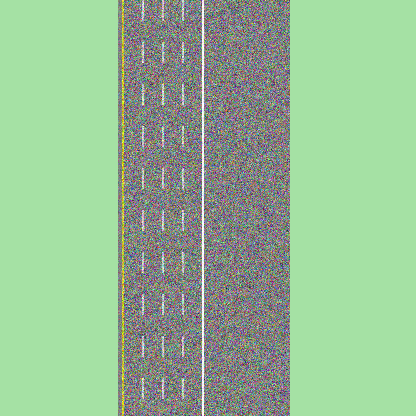

In [3]:
from PIL import Image
#testing output of data-set
img = Image.open(IMAGE_PATH+"/500.png")
test_tensor = torch.load(TENSOR_PATH+'/500.pt')
img

index for channel road : 0


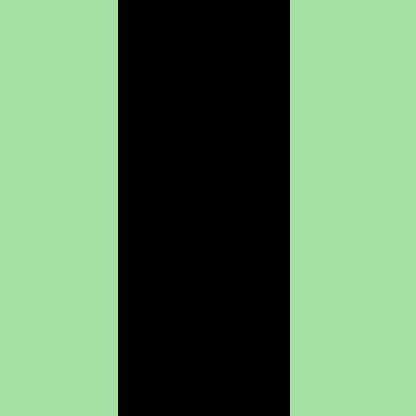

In [4]:
DrawingWithTensors.showInferenceOnImage(img, test_tensor, "road", 0.6, imageGen.classMap)